<a href="https://colab.research.google.com/github/VinciGit00/Python/blob/main/NeuralNetwork/FirstNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashiondata = tf.keras.datasets.mnist


In [3]:
(x_train, y_train), (x_test, y_test) = fashiondata.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train, x_test = x_train/255, x_test/255

# Creation of the model

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation = 'softmax')

])

In [8]:
model.compile(optimizer = "adam", 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [21]:
mfit = model.fit(x_train, y_train, epochs = 10, validation_split = 0.2,
           verbose = 0)

In [22]:
vall_loss, vall_acc = model.evaluate(x_test, y_test)
print(vall_loss, vall_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0808 - accuracy: 0.9814
0.08082766085863113 0.9814000129699707


Text(0, 0.5, 'Cost function')

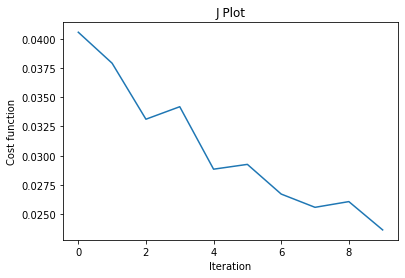

In [23]:
import matplotlib.pyplot as plt
J = mfit.history['loss']
plt.plot(J)
plt.title("J Plot")
plt.xlabel("Iteration")
plt.ylabel("Cost function")


In [24]:
import pandas as pd
hist = pd.DataFrame(mfit.history)
hist['epoch'] = mfit.epoch
hist.head()

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.040549,0.986479,0.021152,0.992833,0
1,0.037904,0.987417,0.023923,0.991500,1
2,0.033122,0.988792,0.027195,0.991000,2
3,0.034189,0.988063,0.031633,0.989417,3
4,0.028854,0.990313,0.030072,0.990250,4


In [33]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.1])
  plt.xlabel('Epoch')
  plt.ylabel('Cost function')
  plt.legend()
  plt.grid(True)

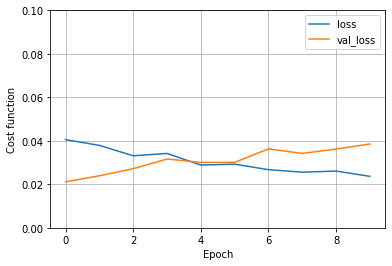

In [34]:
plot_loss(mfit)
